In [27]:
# dataset obtained from the kaggle dataset
import zipfile 
with zipfile.ZipFile('cardataset.zip') as myzip:
    myzip.extractall()

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
df = pd.read_csv('data.csv')

In [30]:
# formatting the dataframe columns names for consistency
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [31]:
# formatting the dataframe columns values (of type string) for consistency
string_columns = [col for col in df.columns if df[col].dtype == 'object']
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [32]:
# since we are insterested in the MSRP columns we check for null values
df.msrp.isnull().sum()

0

[]

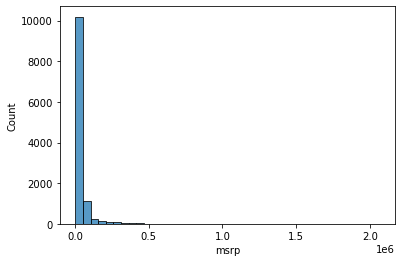

In [33]:
# We are good to go since there aren't any null values
# we check the distribution of the dataset visually
sns.histplot(df.msrp, bins  = 40)
plt.plot()


<AxesSubplot:xlabel='msrp', ylabel='Count'>

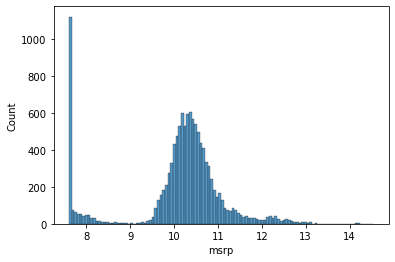

In [34]:
# because the data is highly skewed we used the logarithm of the dataset 
# approximate to a normal distribution
sns.histplot(np.log1p(df.msrp))

In [35]:
# Split the data into 3 parts: Train dataset (60%), Test dataset (20%) and
# validation dataset(20%)

# total number of elements
n = len(df)
n_train = int(0.6 * n)
n_val  = int(0.2 * n)
n_test   = n - (n_train + n_val)

In [36]:
# now shuffle the data and split the data set after
np.random.seed(2)
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val   = df_shuffled.iloc[n_train : n_train + n_val].copy()
df_test  = df_shuffled.iloc[n_train + n_val : ].copy()

# extract the required data and apply np.log1p() 
ytrain = np.log1p(df_train.msrp)
yval   = np.log1p(df_val.msrp)
ytest  = np.log1p(df_test.msrp)

# remove the 'msrp' data from the shuffled dataset so it can't be mistakenly 
# used

df_train.drop('msrp', axis = 1, inplace = True)
df_val.drop('msrp', axis = 1, inplace = True)
df_test.drop('msrp', axis = 1, inplace = True)


In [37]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 7557, dtype: object

In [38]:
# microtesting features before we build our model
base_features = ['engine_hp', 'city_mpg', 'popularity']
df_train.iloc[10][base_features]

engine_hp     453.0
city_mpg         11
popularity       86
Name: 7557, dtype: object

In [86]:
x = df_train.iloc[10][base_features].values

In [87]:
w = [7.17, 0.01, 0.04, 0.002]

In [88]:
x

array([453.0, 11, 86], dtype=object)

In [89]:
xi = np.concatenate((b,x))

In [97]:
sum = 0
for i in range(len(xi)):
    sum += xi[i]*w[i]
print(sum)

12.312


In [95]:
np.dot(xi, w)

12.312

In [99]:
np.exp(12.31 + 1)

603197.5294933666

In [103]:
X = df_train.iloc[[1,2,10]][base_features].values

In [105]:
X

array([[ 132.,   25., 2031.],
       [ 148.,   28.,  640.],
       [ 453.,   11.,   86.]])

In [112]:
X1 = np.column_stack([np.ones(3),X])

In [141]:
X2 = np.concatenate(((np.ones(3).reshape(3,1)),X), axis = 1 )

In [147]:
w = np.array(w)

In [152]:
predictions = []
for i in range(X1.shape[0]):
    pred = np.dot(w,X1[i])
    predictions.append(pred)

In [153]:
predictions

[13.552, 11.049999999999999, 12.312000000000001]

In [158]:
X1.T.shape

(4, 3)

In [163]:
w = np.reshape(w, (1,4))

In [167]:
np.dot(w, X1.T)

array([[13.552, 11.05 , 12.312]])

In [172]:
np.dot(w, X2.T)

array([[13.552, 11.05 , 12.312]])

array([[13.552, 11.05 , 12.312]])